# Matemática Computacional I
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Integração numérica

A integração numérica é útil em situações nas quais não se conhece a expressão analítica da função a ser integrada ou quando a função primitiva é difícil de se obter ou não existe. Uma forma de se calcular uma aproximação numérica para uma integral é por meio da integração do polinômio interpolador. Esse processo é conhecido como quadratura de Newton-Cotes e é desenvolvido por meio das sistemáticas conhecidas como *Regra dos Trapézios*, *Regra 1/3 de Simpson* e *Regra 3/8 de Simpson*. Antes de apresentarmos as fórmulas de Newton-Cotes, vamos relembrar um pouco do Cálculo.

Considere uma função $f(x)$ contínua no intervalo $[a,b]$. Então, sabemos que

$$I=\int_a^b f(x)dx = F(b) - F(a)$$

em que a função $F(x)$ é a primitiva (ou antiderivada) de $f$, ou seja, é tal que $F'(x) = f(x)$.

Graficamente, considerando a função $f(x) \geq 0$, para todo $x \in [a,b]$ podemos interpretar a intergral $I=\int_a^b f(x)dx$ como a área entre a curva de $f$ e o eixo das abcissas:

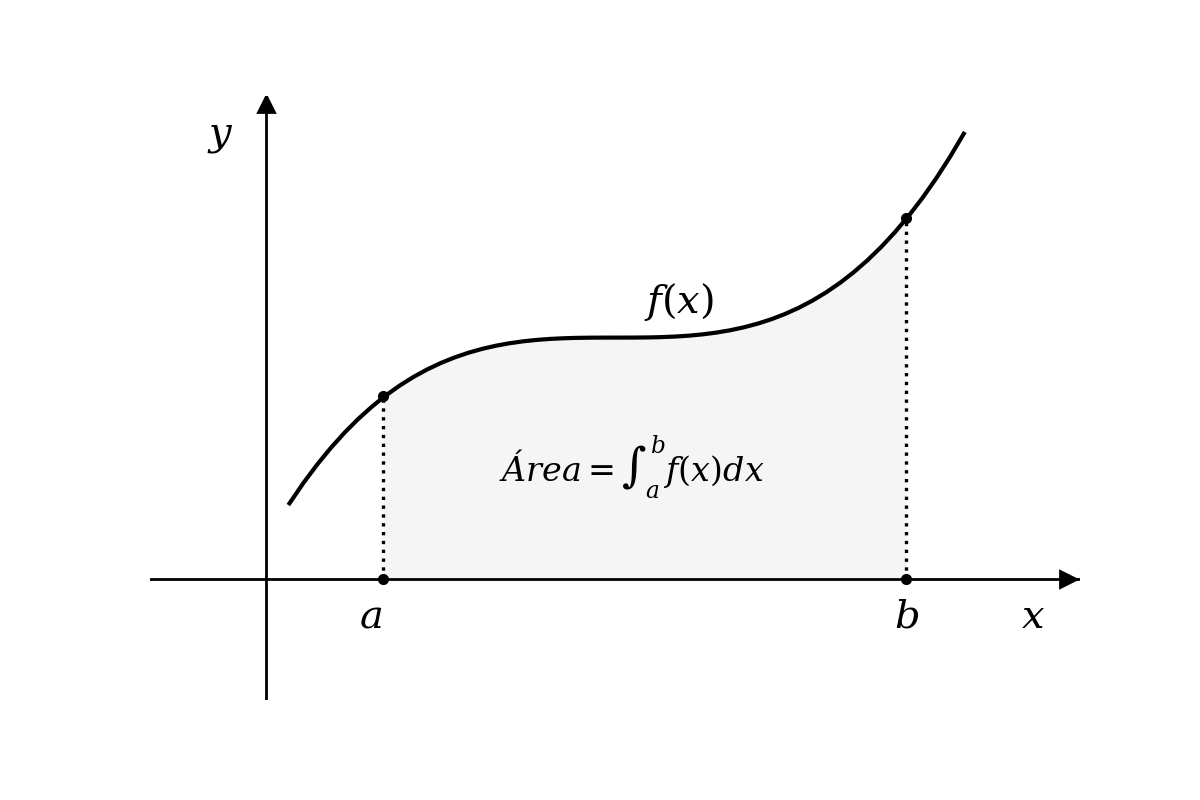
Figura 6.1 - A integral definida como área sob o gráfico

### Integral via somas de Riemann

A forma mais simples de obter um valor aproximado para uma integral definida é por meio da soma de Riemann. 

Para isto, divide-se o intervalo de integração $(a,b)$ em $n$ subintervalos e somam-se as áreas dos retângulos definidos em cada subintervalo. A largura de cada retângulo será dado por $h=\frac{x_n-x_0}{n}$ e a altura será dada por $f(x)$ para algum $x$ dentro do subintervalo $[x_i,x_{i+1}]$, com $i=0,1,...,n$. Uma escolha natural para o valor de $x$ é um dos extremos do intervalo, o extremo esquerdo $x_i$ ("pela esquerda") ou o extremo direito $x_{i+1}$ ("pela direita"):


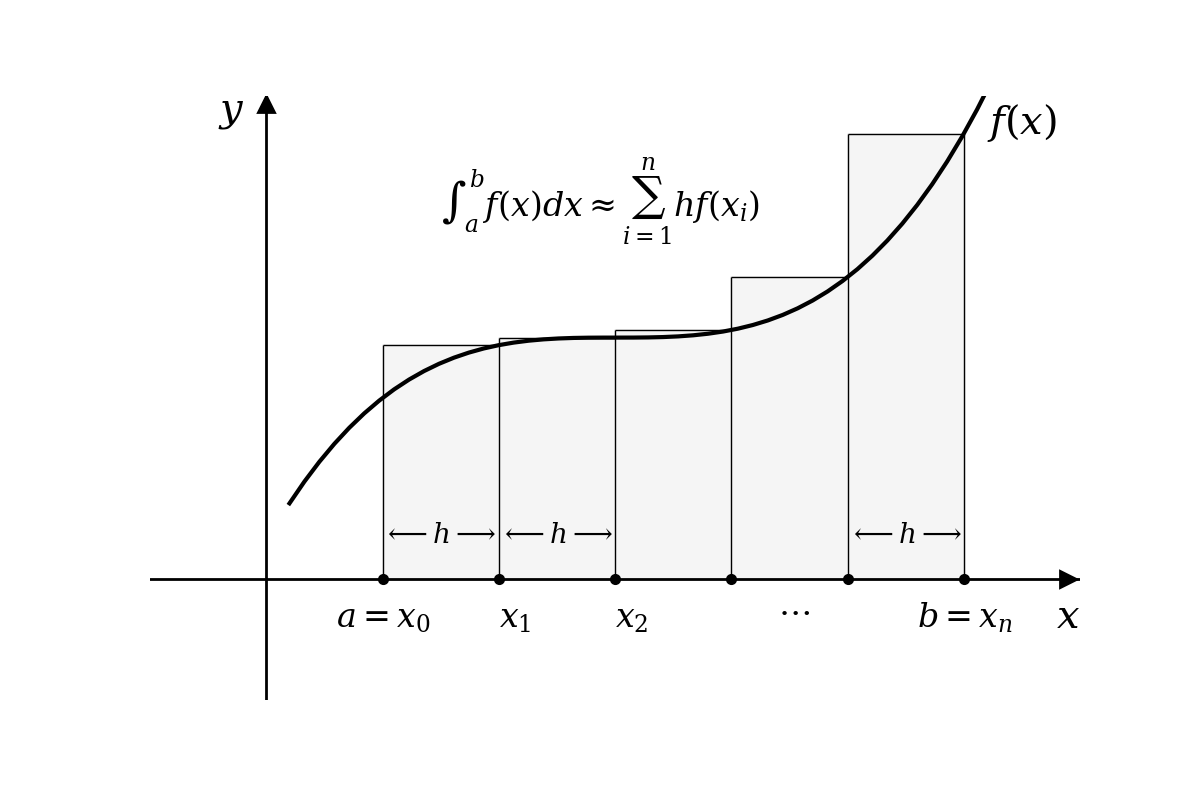
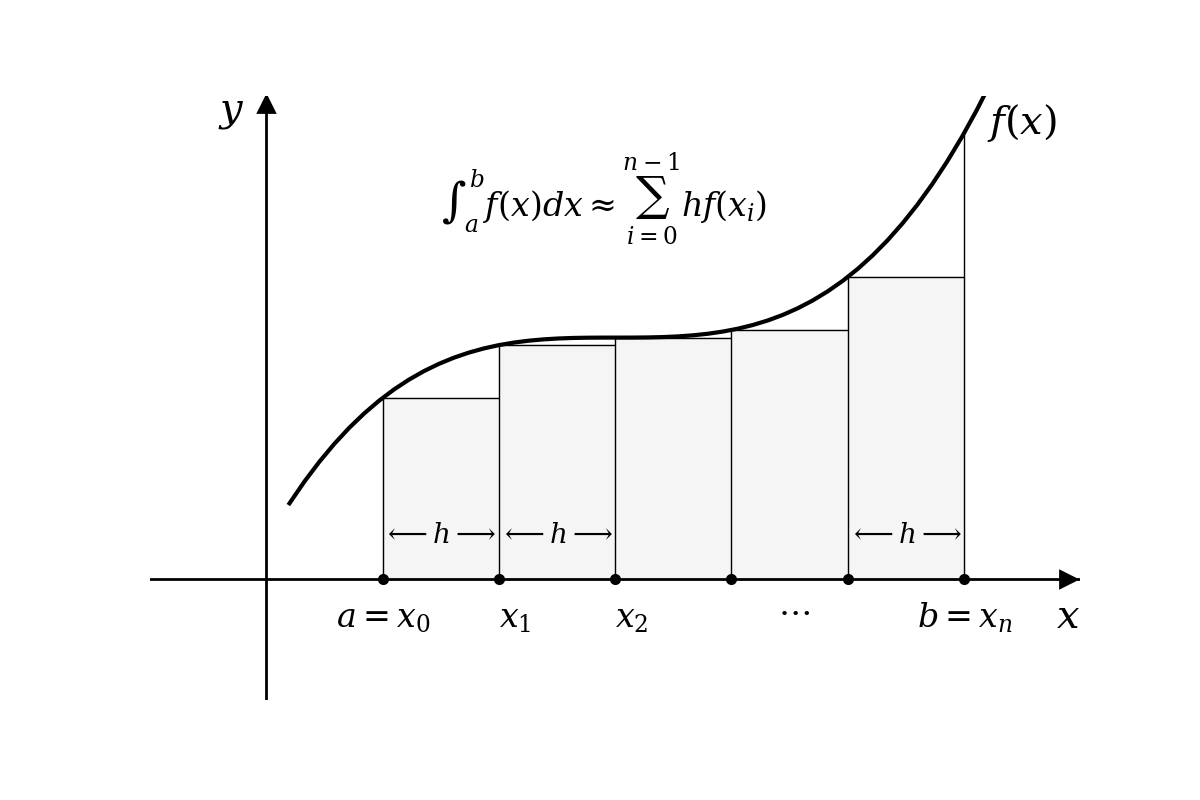


Claramente podemos aumentar a acurácia da aproximação obtida aumentando o número de subintervalos. A _regra do ponto médio_ considera a altura do retângulo definida em cada subintervalo como sendo o valor da função no ponto médio entre $x_i$ e $x_{i+1}$:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf\left(\frac{x_i+x_{i+1}}{2} \right)$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Vamos começar simples, calculando a integral de f(x) = x^2 sin(x)

def integral_definida_esquerda(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral
  integral = np.sum(f(xi[0:n-1])) * h

  return integral


def integral_definida_direita(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral
  integral = np.sum(f(xi[1:n])) * h

  return integral

def integral_definida_pt_medio(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral

  integral = 0
  for i in range(0,n-1):
    integral = integral + h*f((xi[i] + xi[i+1])/2)

  return integral

f = lambda x: np.sin(x)*x**2
a = 0
b = np.pi
n = 1000

print(integral_definida_esquerda(f,a,b,n))
print('*'*100)
print(integral_definida_direita(f,a,b,n))
print('*'*100)
print(integral_definida_pt_medio(f,a,b,n))

Podemos utilizar o ``sympy`` para obter a integração simbólica.

**Exemplo 1** 

Vamos obter a integral $\int_{0.1}^{0.8} x^2ln(x)dx$ usando `sympy`

In [ ]:
import sympy as sp

x = sp.symbols('x')
sp.init_printing(use_unicode=True)

f = x**2*log(x)
sp.integrate(f, x)

Calculando o resultado a integral definida, usando o Teorema Fundamental do Cálculo

In [ ]:
F = lambda x: x**3*log(x)/3 - x**3/9
I = F(0.8)-F(0.1)
print(I)

Vamos obter aproximações numéricas usando soma de Riemann pela esquerda, pela direita e pela regra do ponto médio, e comparar os resultados.

Agora o resultado aproximado pela soma de Riemann com 7 subintervalos, ou seja, $h = 0.1$

In [ ]:
xi = np.linspace(0.1, 0.8, 8)
h = xi[1]-xi[0]

f = lambda x: x**2*np.log(x)

Ie = h*np.sum(f(xi[0:-1]))
print("Ie=",Ie, "Erro=",abs(I-Ie))

Id = h*np.sum(f(xi[1:]))
print("Id=",Id, "Erro=",abs(I-Id))

Im = h*np.sum(f((xi[0:-1]+xi[1:])/2))
print("Im=",Im, "Erro=",abs(I-Im))


Nesse exemplo é possivel notar que a regra do ponto médio forneceu a melhor aproximação.

**Atividade 1:**

Calcule primeiramente a integral indefinida (usando o `sympy`) das funções abaixo. Logo após, compare o resultado obtido com aproximações numéricas para as integrais definidas.

a) $\int_{1}^{1.6} \frac{2x}{x^2-4} dx$  

b) $\int_{0}^{1} x^2 e^{-x} dx$

c) $\int_{0}^{1} \frac{cos(2x)}{x^{1/3}}dx$

O que pode-se afirmar do resultado via `sympy` da letra (c)?

A seguir serão apresentados três métodos para integração numérica baseados na integração do polinômio interpolador conhecidos como Regras de Newton-Cotes. São eles, a regra dos trapézios, a regra 1/3 de Simpson e a regra 3/8 de Simpson.

### Regra dos trapézios

Consiste am aproximar a integral da função em um intervalo [𝑎,𝑏] pela integral do polinômio de grau 1 que passa pelos pontos (𝑎,𝑓(𝑎)) e (𝑏,𝑓(𝑏)). Se 𝑓(𝑥)>0 em [𝑎,𝑏] a área entre o gráfico da função e o eixo 𝑥 é aproximado pela área do trapézio de altura ℎ=𝑏−𝑎 e bases 𝑓(𝑎) e 𝑓(𝑏).

Considere uma função $f(x)$ definida nos pontos $x_0$ e $x_1$ no intervalo $[a,b]$. O polinômio de Lagrange para  esses pontos, considerando a mudança de variável $u = \frac{x-x_0}{h}$, é dado por

$$P(u) =  f(x_0) (1-u) + f(x_1)(u)$$

e a integral pode ser aproximada como segue

$$\int_{x_0}^{x_n} f(x) dx \approx \int_{x_0}^{x_1} P_1(x) dx= h \int_{0}^{1} P_1(u) du$$

ou, ainda,

$$h \int_{0}^{1} P_1(u) du  = h \int_{0}^{1} [f(x_0) (1-u) + f(x_1)(u)] du = h f(x_0) \int_{0}^{1} (1-u) du + hf(x_1)\int_{0}^{1} (u) du$$

que resulta em

$$\int_{x_0}^{x_n} f(x) dx \approx \frac{h}{2} [f(x_0)+f(x_1)]$$

ou seja, tem-se aqui a fórmula da área do trapézio.


Graficamente, tem-se

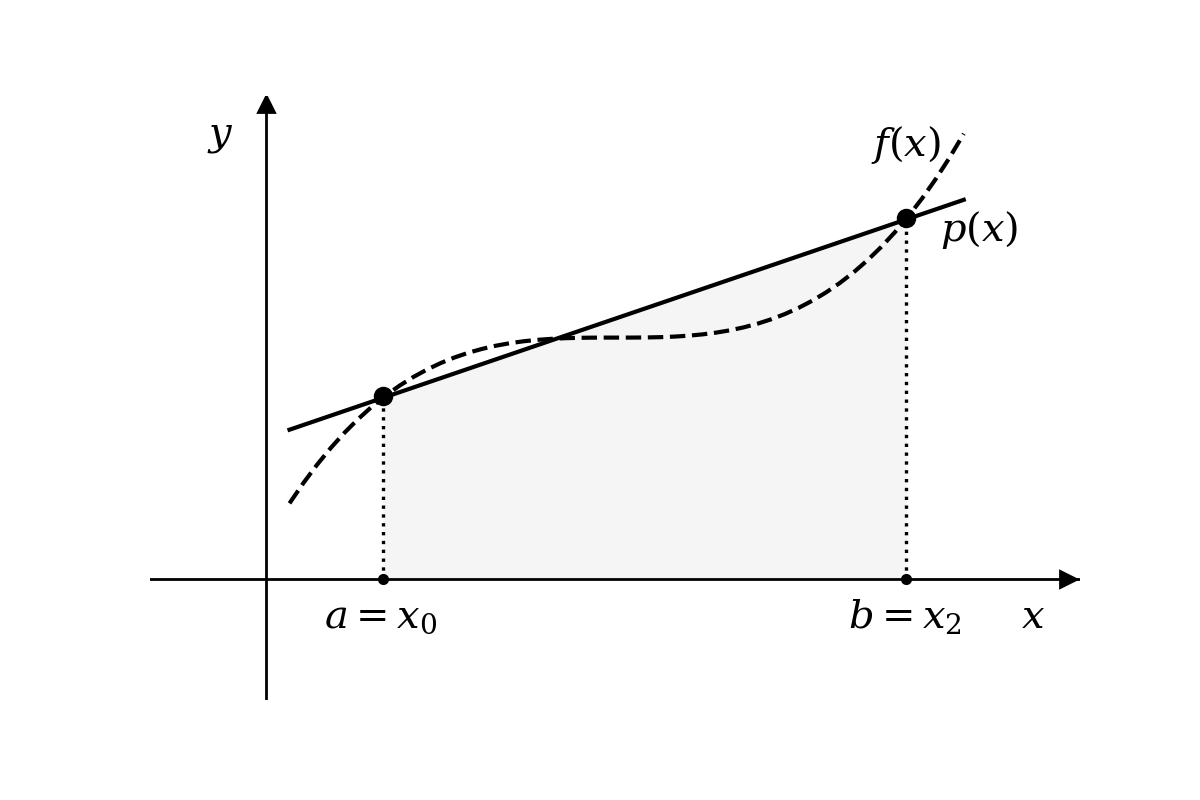


A **regra dos trapézios repetida** (ou generalizada), consiste na subdivisão do intervalo $[a,b]$ em $n$ subintervalos iguais, de amplitude $h=\frac{x_n-x_0}{n}$, $x_0=a$ e $x_n=b$ e na aplicação da regra dos trapézios repetidamente a cada dois pontos consecutivos.

Assim, temos

$$\int_{x_0}^{x_n} f(x) dx \approx \frac{h}{2} [f(x_0)+f(x_1)] + \frac{h}{2} [f(x_1)+f(x_2)] + ... + \frac{h}{2} [f(x_{n-1})+f(x_n)]=$$

$$= \frac{h}{2} [f(x_0)+ 2f(x_1) + 2f(x_2)+...+2f(x_{n-1})+f(x_n)] =$$

$$= \frac{h}{2} \{f(x_0)+ 2[f(x_1) + f(x_2)+...+f(x_{n-1})]+f(x_n)\}$$

E o **limitante superior** para o erro será dado por

$$|E_t| \leq \frac{h^2}{12}(x_n-x_0) max.\{|f^{(2)}(x)|, x_0 \leq x \leq x_n \}$$

**Exemplo 2:** 

Vamos calcular o valor aproximado da integral

$$\int_{1.5}^{5.5} \frac{1}{x}dx$$

usando a regra dos trapézios.

_Solução:_ Basta fazer  $$\int_{1.5}^{5.5} \frac{1}{x} dx \approx \frac{4}{2} [f(1.5)+f(5.5)] = 2 \left( \frac{1}{1.5} + \frac{1}{5.5} \right) \approx 1.697$$

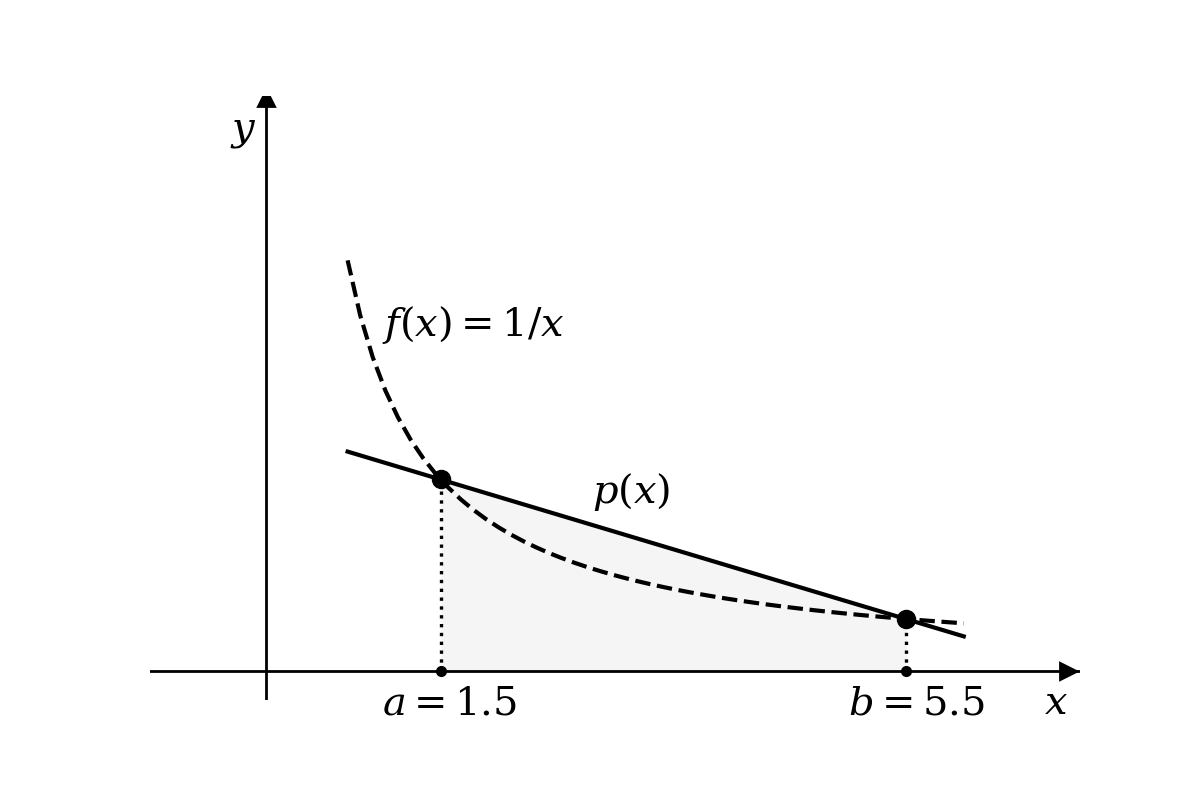

Resolvendo analiticamente o valor exato é $ln(5.5)$ - $ln(1.5)$ que pode ser calculado usando  uma calculadora obtendo-se $1.2992829841302609$. O valor obtido pela regra do trapézio é maior, como pode ser verificado observando na figura, comparando-se as áreas. Vamos usar a regra dos trapézios repetida para 5, 10 e 100 subintervalos para ver como fica.

In [ ]:
import numpy as np

x0 = 1.5
xn = 5.5
f = lambda x: 1/x

for n in [5,10,100, 1000, 10000]:
  h = (xn-x0)/n
  xi = np.linspace(x0, xn, n+1)
  It = (h/2)*(f(xi[0]) + 2*np.sum(f(xi[1:-1])) + f(xi[-1]))
  print ("n=",n,", I=",It)